Importing the Dependencies

In [1]:
import numpy as np #for numeric data
import pandas as pd # for rows and columns
import matplotlib.pyplot as plt #for graph plot
import seaborn as sns # for visualization
import sklearn.datasets #for getting the datasets
from sklearn.model_selection import train_test_split # for splitting the test and train data

from xgboost import XGBRegressor # model for predicition
from sklearn import metrics 

In [4]:
house_price_dataset = pd.read_csv('./ParisHousing.csv')

In [5]:
house_price_dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [6]:
house_price_dataset.shape

(10000, 17)

In [7]:
house_price_dataset.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [8]:
house_price_dataset.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [10]:
correlation = house_price_dataset.corr() 

<Axes: >

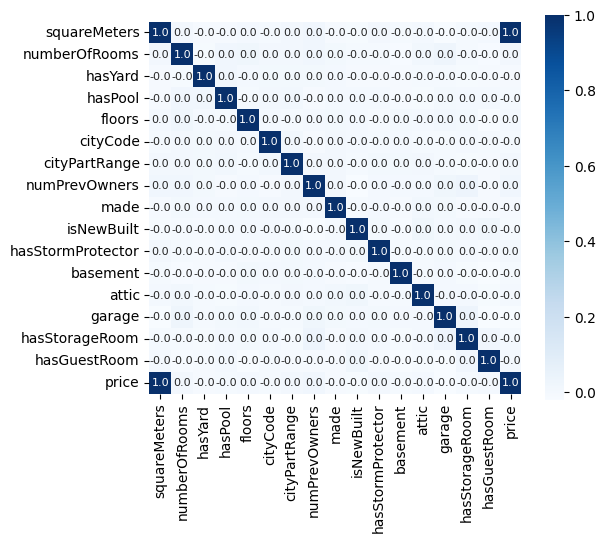

In [11]:
plt.figure(figsize=(6,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size' : 8}, cmap='Blues')

Splitting the price data from the dataset

In [13]:
X = house_price_dataset.drop(['price'],axis=1)
Y = house_price_dataset['price']

In [14]:
print(X)
print(Y)

      squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005        

Splitting testing and Training Data

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, random_state=1, test_size=.2)

In [17]:
print(X.shape, X_test.shape, X_train.shape)

(10000, 16) (2000, 16) (8000, 16)


Using the Model Training

XGBoost Regressor

In [20]:
model = XGBRegressor()

Training the model with X_train

In [21]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

In [22]:
training_data_prediction = model.predict(X_train)

In [23]:
print(training_data_prediction)

[3812531.  6091521.  6054646.5 ... 1354706.2 8256748.5 2935986.5]


In [24]:
# we will be comparing the value of X_train with Y_train
#R squared Error

score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [25]:
print('The Squared Error is: ', score_1)
print('The Mean Absolute Error is: ', score_2)

The Squared Error is:  0.9999951798623046
The Mean Absolute Error is:  4741.489404614256


Visualizing the actual data vs predicted Data

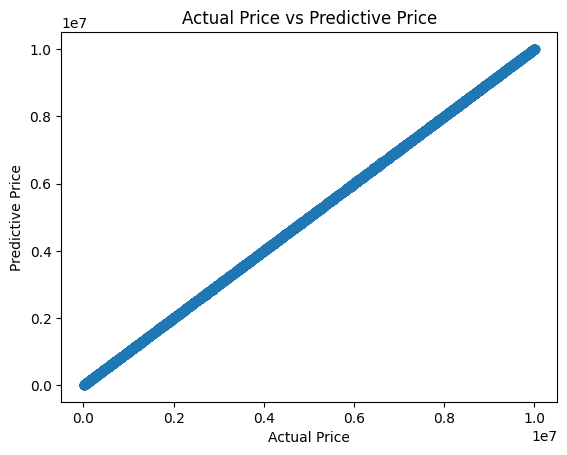

In [30]:
plt.scatter(Y_train,training_data_prediction) #Y_train is the original data
plt.xlabel("Actual Price")
plt.ylabel('Predictive Price')
plt.title('Actual Price vs Predictive Price')
plt.show()

Prediction on Test Data

#accuracy for prediction on test data


In [27]:
test_data_prediction = model.predict(X_test);


In [29]:
#R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

#Mean Absolute value
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)


print('The R square error for test data is: ',score_1)
print("The Mean Absolute value is: ",score_2)

The R square error for test data is:  0.9999880507526583
The Mean Absolute value is:  7689.301779687494
